#**Mobile Price Classification using Machine Learning**

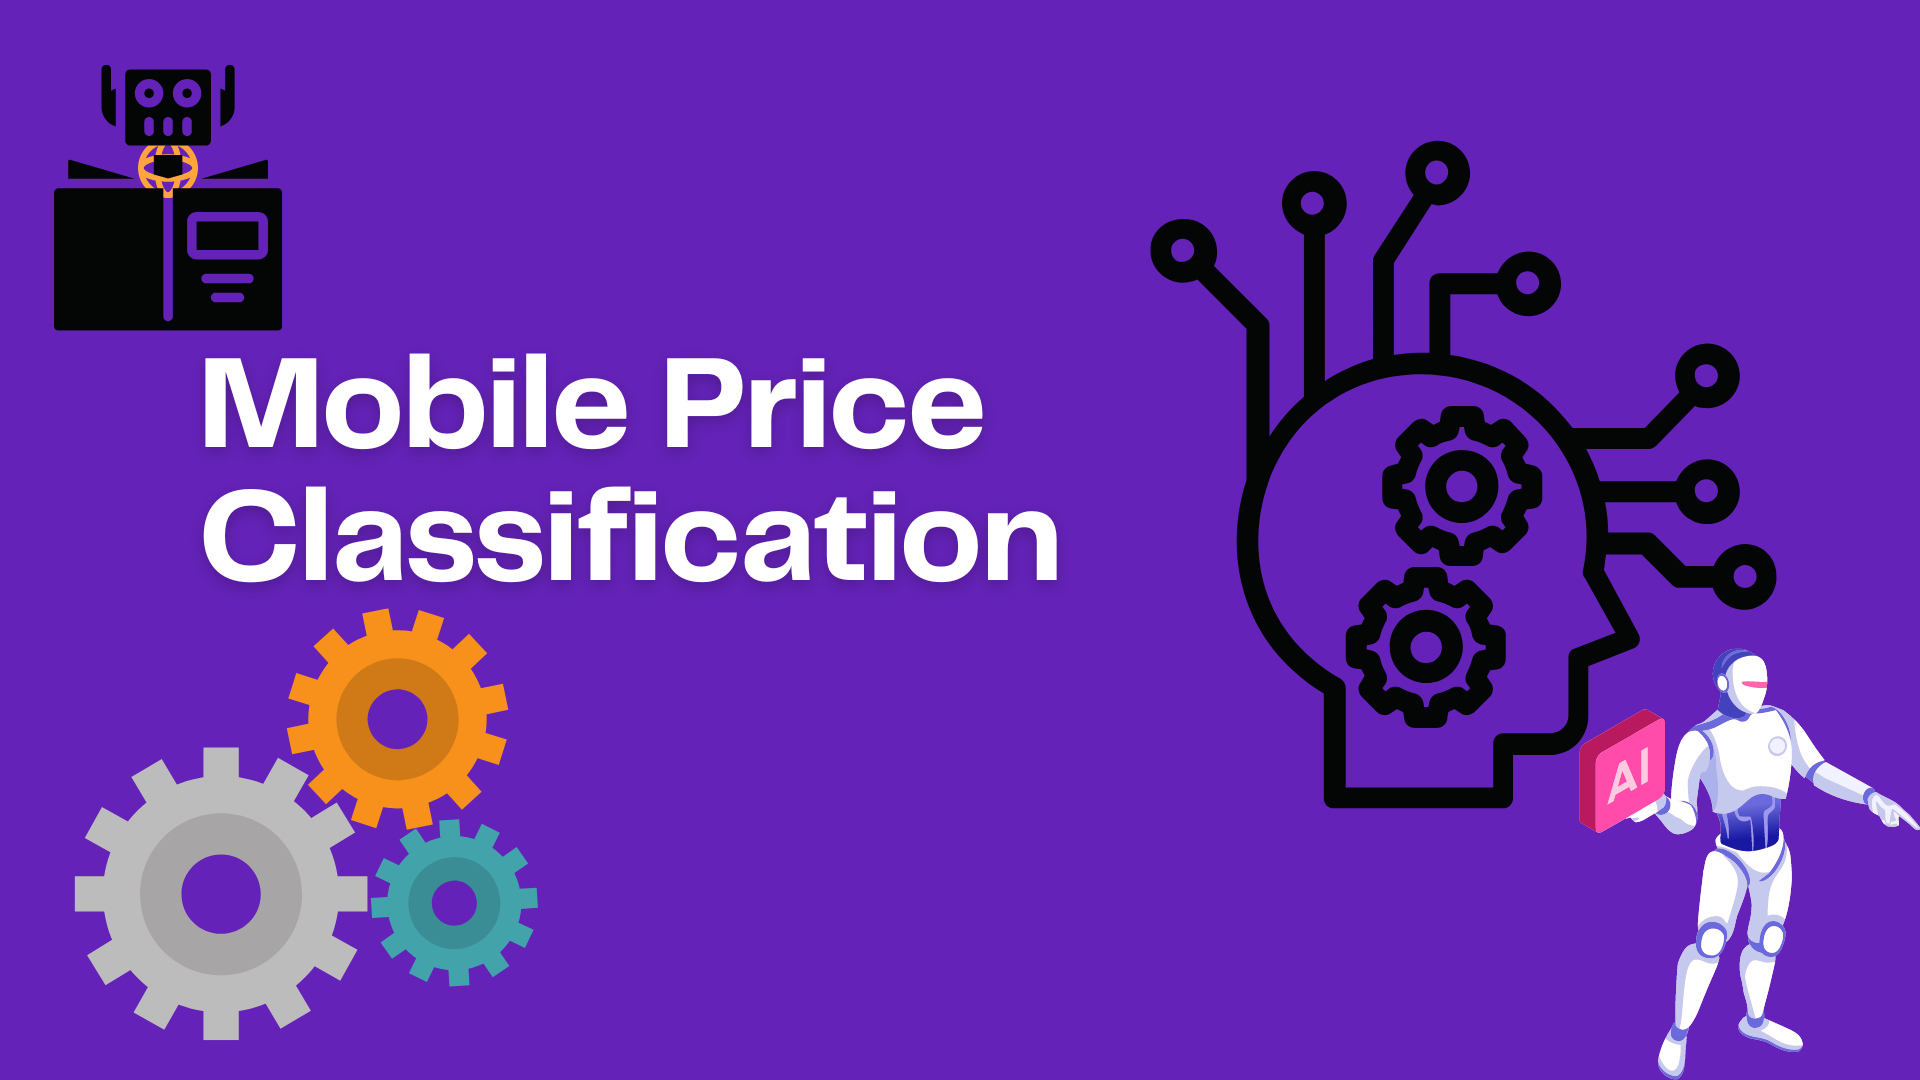

### **Introduction:**
In todays market, mobile phones come in a wide range of prices, each offering different features and specifications. For consumers, selecting a mobile phone that aligns with their budget and requirements can be challenging. To assist consumers in making informed decisions, this project aims to develop a machine learning model that can classify mobile phones into different price ranges based on their features.

### **Problem Statement**:
The task is to build a predictive model that can accurately classify mobile phones into predefined price ranges based on various attributes such as battery power, camera features, memory, connectivity options, and more. The dataset provided contains information about several mobile phones, including their specifications and corresponding price ranges.

### **Objectives:**
* Explore and preprocess the dataset to handle missing values, outliers, and any other data inconsistencies.
* Perform exploratory data analysis (EDA) to gain insights into the relationships between different features and the target variable (price range).
* Select appropriate machine learning algorithms for classification and evaluate their performance using suitable metrics.
* Fine-tune the chosen model to improve its predictive accuracy.
* Validate the final model using cross-validation techniques to ensure its robustness.
* Deploy the model for real-time predictions if applicable.

### Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/test.csv')

**Dataset Description:**

The dataset comprises the following columns:
- battery_power: Total energy a battery can store in mAh.
- blue: Bluetooth enabled (1 if yes, 0 if no).
- clock_speed: Speed at which microprocessor executes instructions.
- dual_sim: Dual SIM support (1 if yes, 0 if no).
- fc: Front Camera mega pixels.
- four_g: 4G network support (1 if yes, 0 if no).
- int_memory: Internal Memory (in gigabytes).
- m_dep: Mobile Depth in cm.
- mobile_wt: Weight of mobile phone.
- n_cores: Number of cores of the processor.
- pc: Primary Camera mega pixels.
- px_height: Pixel Resolution Height.
- px_width: Pixel Resolution Width.
- ram: Random Access Memory in megabytes.
- sc_h: Screen Height of mobile in cm.
- sc_w: Screen Width of mobile in cm.
- talk_time: Longest time that a single battery charge will last when you are talking.
- three_g: 3G network support (1 if yes, 0 if no).
- touch_screen: Touch screen support (1 if yes, 0 if no).
- wifi: Wifi connectivity (1 if yes, 0 if no).
- price_range: Price range of the mobile phone (0 - low cost, 1 - medium cost,2 - high cost, 3 -very high cost).

#EDA

In [ ]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
print('shape of the dataset is', df_train.shape)

shape of the dataset is (2000, 21)


In [ ]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There aren't any null values. Now let's find the unique values

In [97]:
dict = {}
for i in list(df_train.columns):
    dict[i] = df_train[i].value_counts().shape[0]

pd.DataFrame(dict, index=["Unique Values"]).transpose()

,Unique Values
battery_power,1094
blue,2
clock_speed,26
dual_sim,2
fc,20
four_g,2
int_memory,63
m_dep,10
mobile_wt,121
n_cores,8


In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
df_train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Data Visualization

Outliers

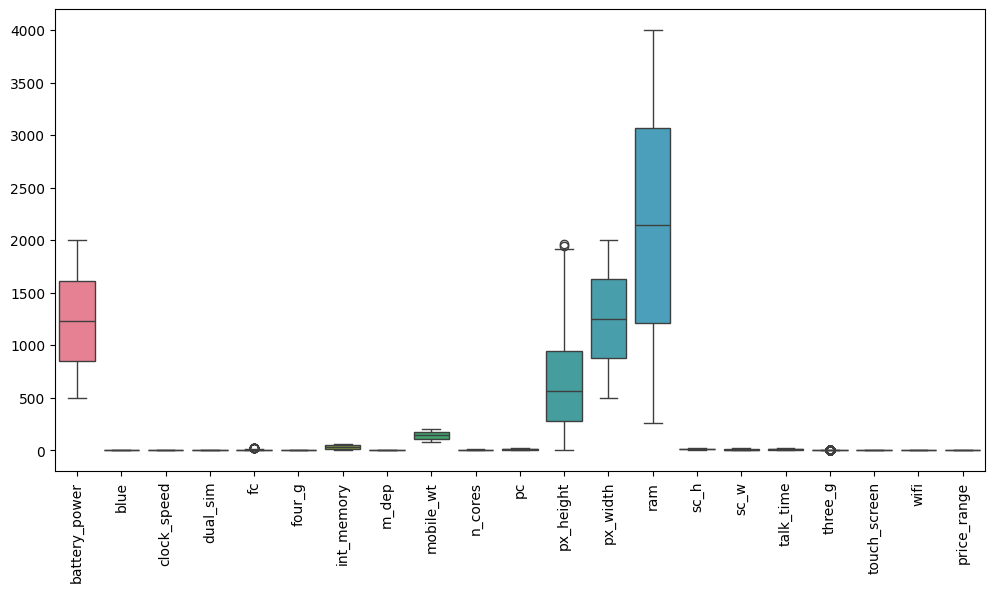

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_train)
plt.xticks(rotation=90)
plt.show()

How is ram related to price_range?

<Axes: xlabel='ram', ylabel='Density'>

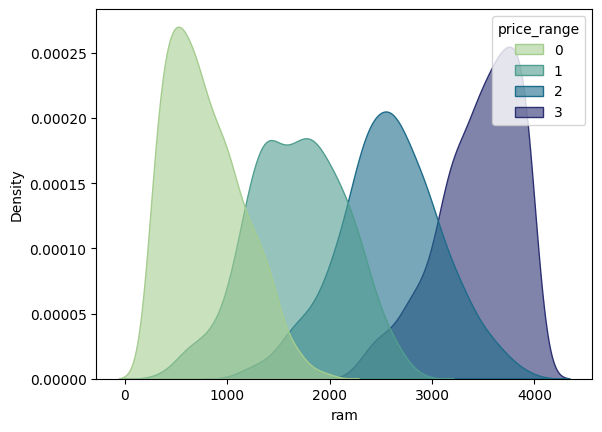

In [ ]:
sns.kdeplot(x='ram',hue='price_range',data=df_train, fill = True, alpha = 0.6, palette = "crest")

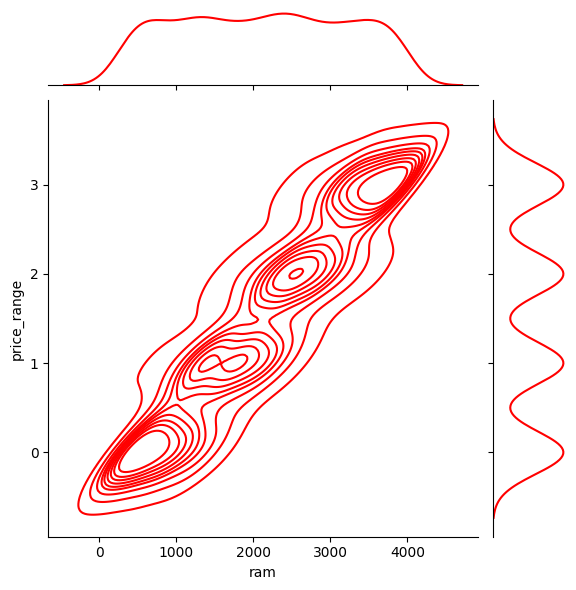

In [ ]:
sns.jointplot(x='ram',y='price_range',data=df_train, kind='kde',color='red')

How is Internal Memory related to Price Range?

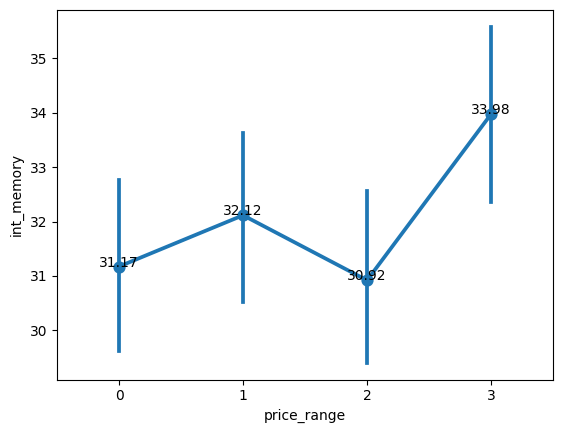

In [ ]:
sns.pointplot(y='int_memory', x='price_range', data = df_train)
for index, value in enumerate(df_train.groupby('price_range')['int_memory'].mean()):
    plt.text(index, value, str(round(value, 2)), color='black', ha="center")

How is Battery Power related to Price Range?

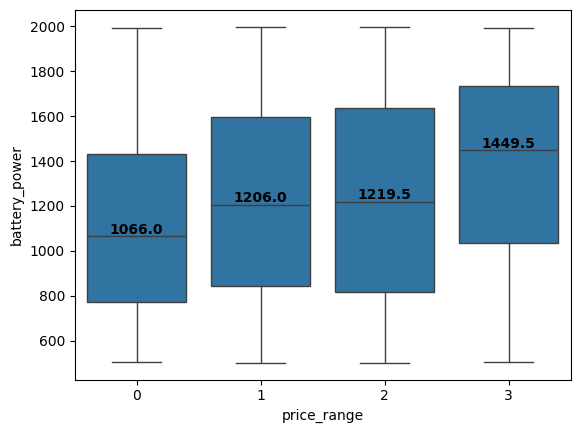

In [ ]:
sns.boxplot(x='price_range',y='battery_power',data=df_train)
medians = df_train.groupby(['price_range'])['battery_power'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

for i, median_label in enumerate(median_labels):
    plt.text(i, medians[i] + 10, median_label, horizontalalignment='center', size='medium', color='black', weight='semibold')

Percentage of phones which support 3G

In [ ]:
labels = ["3G-supported",'Not supported']
values=df_train['three_g'].value_counts().values

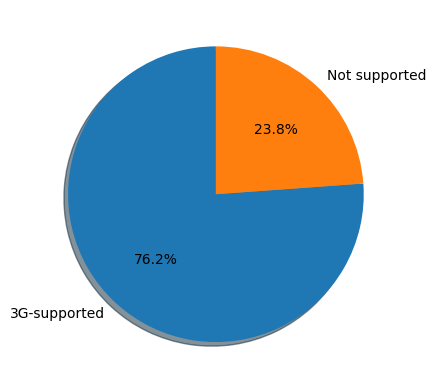

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

Percentage of phones which support 4G

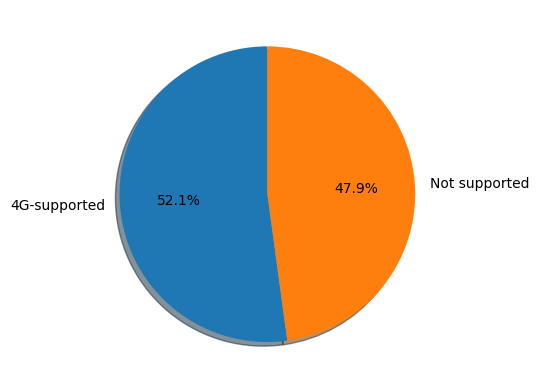

In [ ]:
labels_4g = ["4G-supported",'Not supported']
values_4g = df_train['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values_4g, labels=labels_4g, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

Distribution of Number of phones vs Camera MP of Front and Primary Camera

Text(0.5, 0, 'MegaPixels')

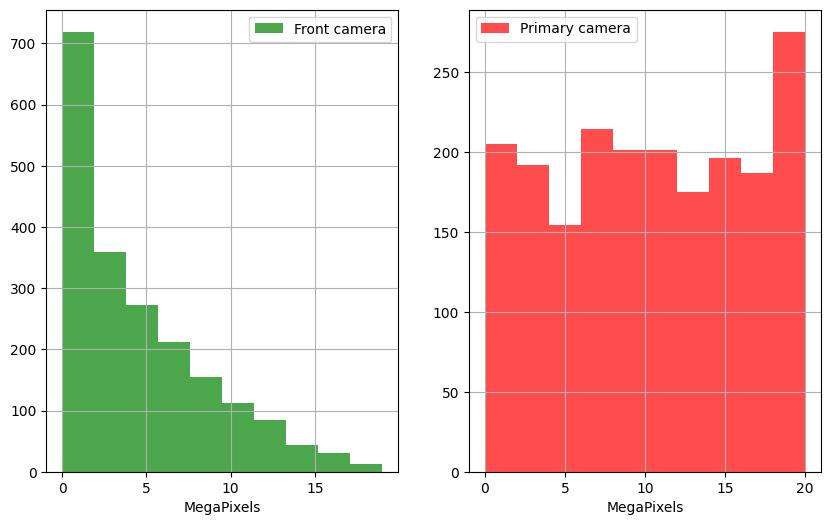

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
df_train['fc'].hist(alpha=0.7,color='green',label='Front camera')
plt.legend()
plt.xlabel('MegaPixels')

plt.subplot(1, 2, 2)
df_train['pc'].hist(alpha=0.7,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

How is Mobile's Weight is related to the Price Range?

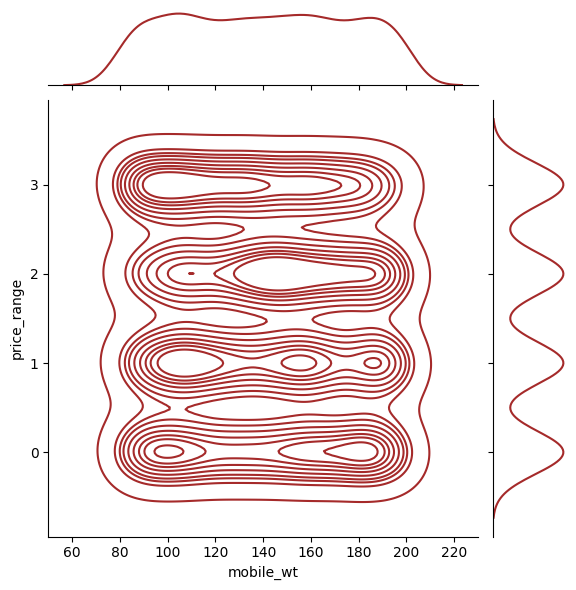

In [ ]:
sns.jointplot(x='mobile_wt', y='price_range', data=df_train, kind='kde',color='brown')

Correlation Heatmap

<Axes: >

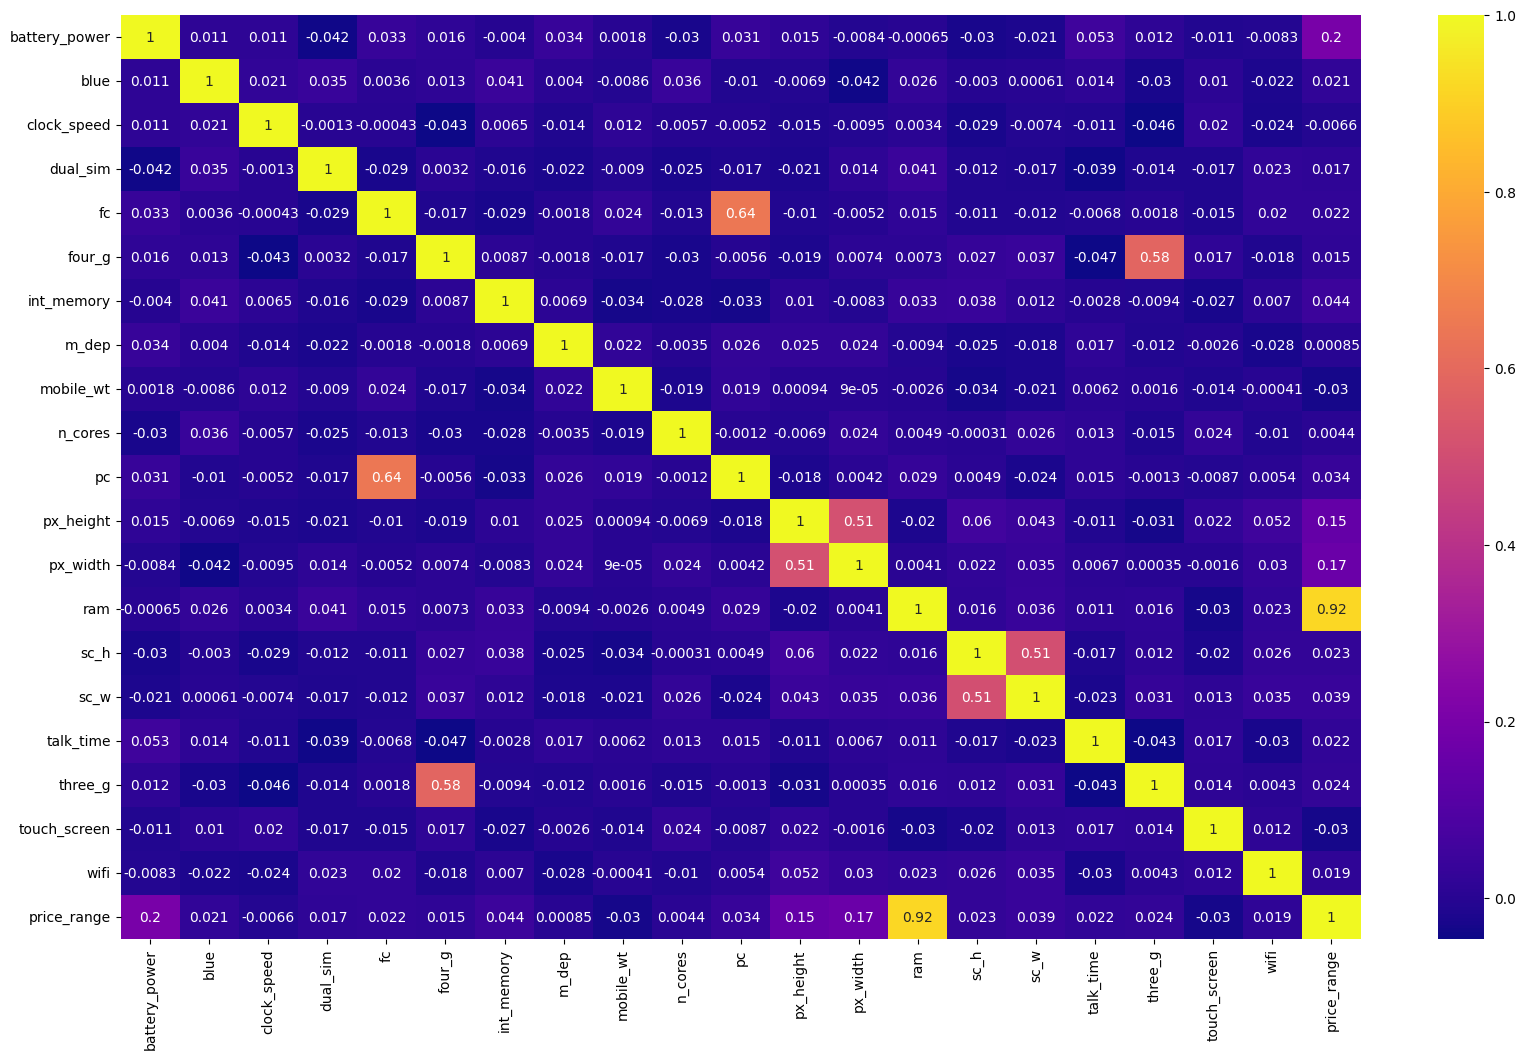

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(df_train.corr(), annot=True, cmap=plt.cm.plasma)

#4. Data Preprocessing

In [ ]:
X = df_train.drop('price_range', axis=1)
y = df_train['price_range']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 20)
(400, 20)
(1600,)
(400,)


# Random Forest

## Key Concepts

### 1. Gini Impurity:
Gini impurity is a measure of the disorder or uncertainty in a set of labels. It quantifies the probability of incorrectly classifying an instance's label if it were randomly labeled according to the distribution of labels in the set.

Gini impurity $Gini(D)$ of a dataset $D$ with $K$ distinct classes is calculated using the following formula:
$$
Gini(D) = 1 - \sum_{i=1}^k p_i^2
$$
Where $p_{i}$ is the probability of randomly selecting an instance of class $i$ from the dataset $D$.


### 2. Bootstraping:
Bootstraping is the process of creating multiple bootstrap samples(data subsets sampled with replacement) from the original training data. Each bootstrap sample is used to grow a different decision tree in the random forest. This process introduces randomness, which helps reduce overfitting and improves the overall predictive accuracy of the ensemble model compared to a single decision tree. It also allows for estimating the generalization error of the random forest using out-of-bag(OOB) observations.


### 3. OOB score(Out-of-Bag Score):
The OOB score is an internal estimate of the prediction error of a random forest model, calculated using the observations that were not included in the bootstrap samples (i.e., out-of-bag observations) used to build each decision tree.

The formula being implemented in the code is:
$$
OOB Error = 1 - \frac{1}{n} * \sum_{i=1}^{n} I(y_i == y_{pred(i)})
$$
Where **n** is the total number of observations, **$y_i$** is the true target value for observation **i**, **$y_{pred(i)}$** is the prediction from the random forest for observation **i** using only trees where **i** was OOB, **$I(x)$** is an indicator function that returns 1 if $x$ is true, 0 otherwise.

### 4. Most common label:
The most common label (or majority class) in a random forest, or any classification problem, refers to the class or label that occurs most frequently in the target variable (y) of the training data.

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#5. Model Selection and Training

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Model Evaluation
y_pred = model.predict(X_test_scaled)
a1 = accuracy_score(y_test, y_pred)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", a1)
print("Accuracy Percentage:",a1*100,"%")

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400

Confusion Matrix:
 [[101   4   0   0]
 [  5  79   7   0]
 [  0   6  80   6]
 [  0   0  15  97]]
Accuracy Score: 0.8925
Accuracy Percentage: 89.25 %


In [ ]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

In [ ]:
# Model Evaluation with Best Model
y_pred_best = best_model.predict(X_test_scaled)

In [ ]:
print("Best Model - Classification Report:\n", classification_report(y_test, y_pred_best))
print("Best Model - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Best Model - Accuracy Score:", accuracy_score(y_test, y_pred_best))

Best Model - Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.89      0.85      0.87        91
           2       0.81      0.87      0.84        92
           3       0.94      0.89      0.92       112

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400

Best Model - Confusion Matrix:
 [[101   4   0   0]
 [  7  77   7   0]
 [  0   6  80   6]
 [  0   0  12 100]]
Best Model - Accuracy Score: 0.895


In [ ]:
# Cross-validation
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)
print("Cross-validation Scores:", cv_scores)
print("Average Cross-validation Score:", np.mean(cv_scores))

Cross-validation Scores: [0.88125  0.890625 0.884375 0.8625   0.85625 ]
Average Cross-validation Score: 0.875
